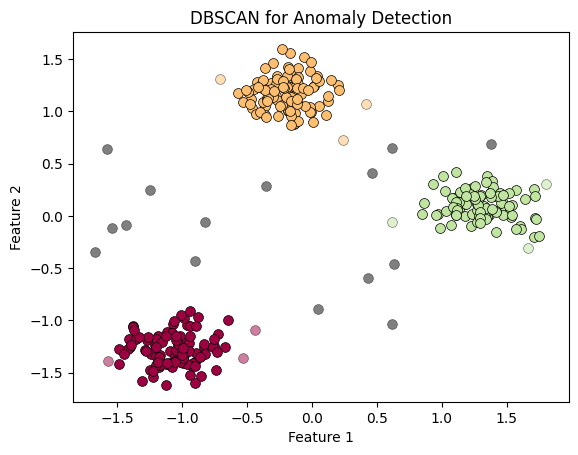

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
 
# Create a synthetic dataset
data, _ = make_blobs(n_samples=300, centers=3, random_state=42)
 
# Introduce some outliers
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))
data = np.vstack([data, outliers])
 
# Standardize the dataset
scaler = StandardScaler()
data = scaler.fit_transform(data)
 
# Apply DBSCAN
epsilon = 0.3
min_pts = 10
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
dbscan.fit(data)
 
# Visualize the results
labels = dbscan.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
 
# Plot the clusters and the outliers
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
 
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # black for outliers
    class_member_mask = (labels == k)
    xy = data[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, linewidths=0.5, edgecolors='k')
    xy = data[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=50, linewidths=0.5, edgecolors='k', alpha=0.5)
 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN for Anomaly Detection')
plt.show()